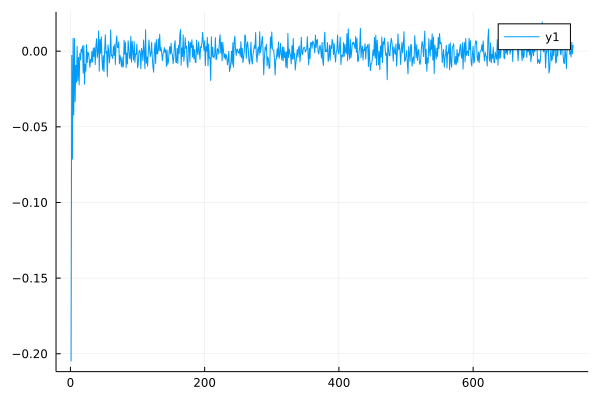

In [24]:
using FFTW, DSP, Plots

N = 1000
P = ones(N)
Ts = 1/1000
A = sqrt.(P/(2*N*Ts)) .* exp.( 1*im .* rand(N) )
# DC sample must be real
n0 = Int(floor( N/2 ) + 1)

# For even-length cases, the first sample has no
# equivalent positive frequency, so we force it
# to be real too.
A[1] = abs( A[1] )

# Force the spectrum to be conjugate symetric.
if( mod(N,2) == 0 )
    A[2:n0-1] = reverse( conj.(A[n0+1:end]) )
else
    A[1:n0-1] = reverse( conj.(A[n0+1:end]) )
end

# Time domain data.
x = real(ifft( ifftshift( A ) ))
plot(x[2:750])

In [25]:
using JuMP

